<a href="https://colab.research.google.com/github/Naman1232/ML-PROJECTS/blob/main/ML_PROJECT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Transaction Detection**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
credit_card =pd.read_csv("creditcard.csv")
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
rows,columns=credit_card.shape
print(f"Number of Rows:{rows}")
print(f"Number of Columns:{columns}")

Number of Rows:284807
Number of Columns:31


In [ ]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
credit_card.duplicated().sum()

1081

In [ ]:
credit_card.duplicated().any()

True

In [ ]:
credit_card.shape

(284807, 31)

In [ ]:
credit_card_new=credit_card.drop_duplicates()
credit_card_new.shape

(283726, 31)

In [ ]:
print(f"Duplicate Transactions:",284807-283726)

Duplicate Transactions: 1081


In [ ]:
credit_card_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
credit_card_new.duplicated().any()

False

In [ ]:
credit_card_new['Class'].value_counts()

,count
Class,
0,283253
1,473


<Axes: xlabel='Class'>

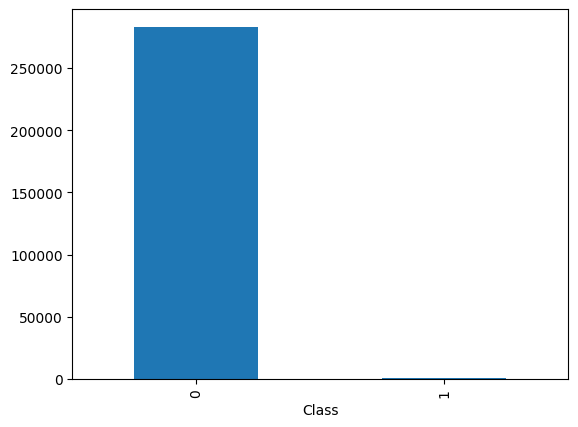

In [ ]:
credit_card_new['Class'].value_counts().plot(kind='bar')

In [ ]:
fraud,legitimate=credit_card_new['Class'].value_counts()

print(f"Legitimate Transaction(0):{fraud}")
print(f"Fraud Transaction(1):{legitimate}")
print(f"This is imbalance data")

Legitimate Transaction(0):283253
Fraud Transaction(1):473
This is imbalance data


In [ ]:
credit_card_new.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
X=credit_card_new.drop('Class',axis=1)
Y=credit_card_new['Class']

In [ ]:
X.shape

(283726, 30)

In [ ]:
Y.shape

(283726,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(X,Y)

In [ ]:
x_smote.shape

(566506, 30)

In [ ]:
y_smote.value_counts()

,count
Class,
0,283253
1,283253


In [ ]:
from collections import Counter

print('Original dataset shape',Counter(Y))
print('Resample dataset shape',Counter(y_smote))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


In [ ]:
fraud_data=credit_card_new[credit_card_new['Class']==1]
legitimate_data=credit_card_new[credit_card_new['Class']==0]

<Axes: ylabel='Frequency'>

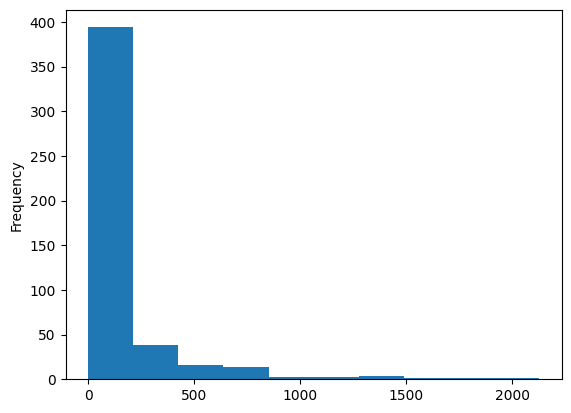

In [ ]:
fraud_data['Amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

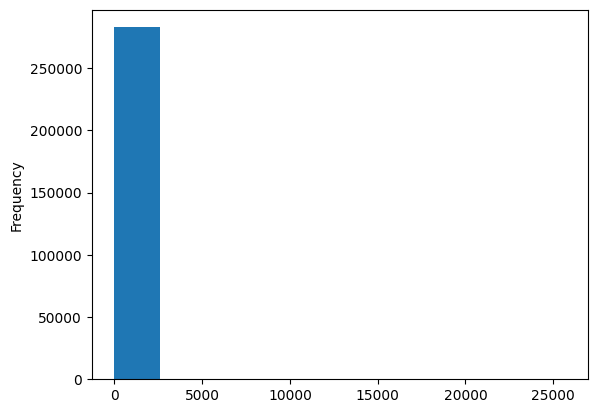

In [ ]:
legitimate_data['Amount'].plot(kind='hist')

<Axes: >

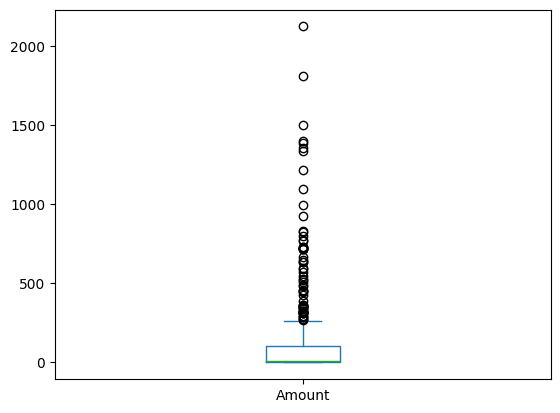

In [ ]:
fraud_data['Amount'].plot(kind='box')

<Axes: >

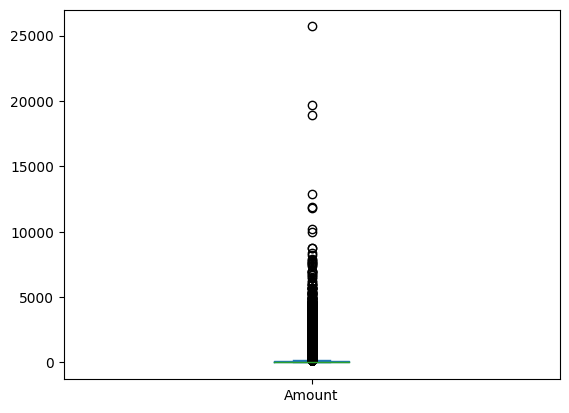

In [ ]:
legitimate_data['Amount'].plot(kind='box')

In [ ]:
corr_imbalanced=credit_card_new.corr()
corr_imbalanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


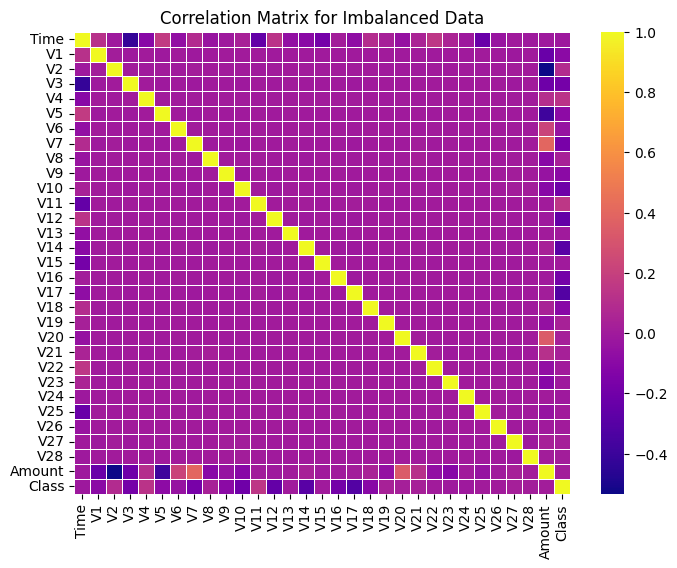

In [ ]:
corr_imbalanced=credit_card_new.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_imbalanced,annot=False,cmap="plasma",linewidths=0.5)
plt.title("Correlation Matrix for Imbalanced Data")
plt.show()

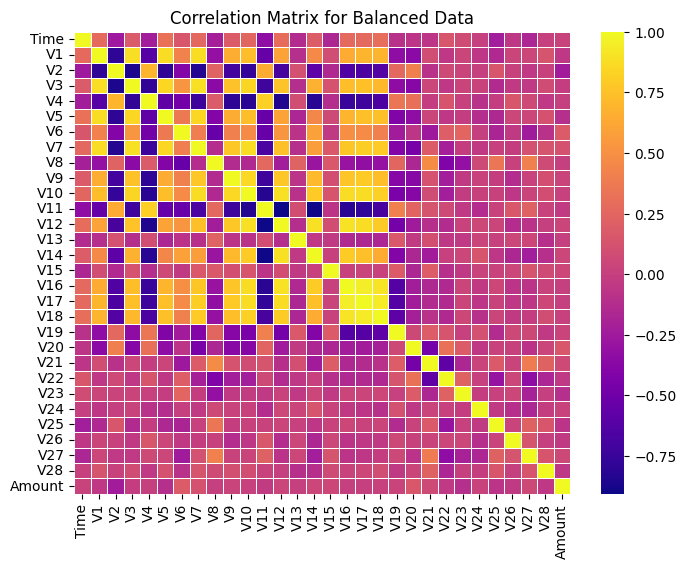

In [ ]:
corr_balanced=x_smote.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_balanced,annot=False,cmap="plasma",linewidths=0.5)
plt.title("Correlation Matrix for Balanced Data")
plt.show()

<ipython-input-62-34396d22790d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote,palette=custom_palette)


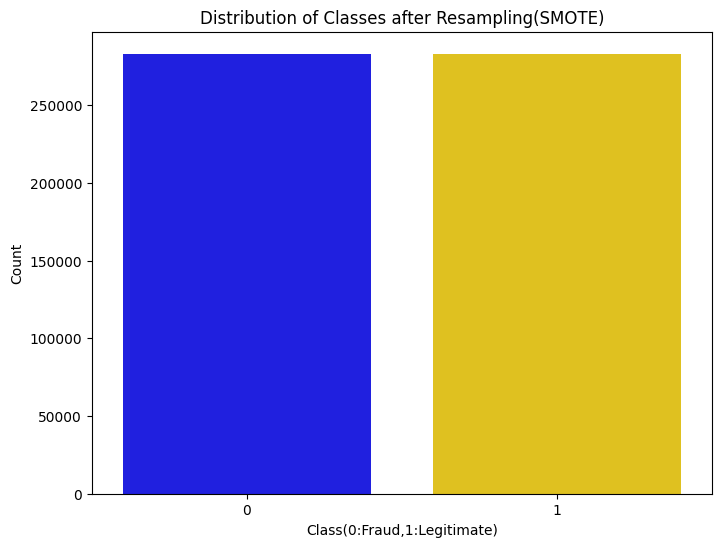

In [ ]:
custom_palette=sns.color_palette(["blue","gold"])
plt.figure(figsize=(8,6))
sns.countplot(x=y_smote,palette=custom_palette)
plt.title("Distribution of Classes after Resampling(SMOTE)")
plt.xlabel("Class(0:Fraud,1:Legitimate)")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_smote,y_smote,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(random_state=42)
logistic_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
Y_pred_logistic=logistic_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
classification_report_logistic=classification_report(Y_test,Y_pred_logistic)
print(classification_report_logistic)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56463
           1       0.98      0.96      0.97     56839

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



In [ ]:
confusion_matrix_logistic=confusion_matrix(Y_test,Y_pred_logistic)
confusion_matrix_logistic

array([[55350,  1113],
       [ 2159, 54680]])

In [ ]:
confusion_matrix_df=pd.DataFrame(confusion_matrix_logistic,
                                 columns=["Predicted Negative(0)","Predicted Positive(1)"],
                                 index=["Actual Negative(0)","Actual Positive(1)"])
confusion_matrix_df

,Predicted Negative(0),Predicted Positive(1)
Actual Negative(0),55350,1113
Actual Positive(1),2159,54680


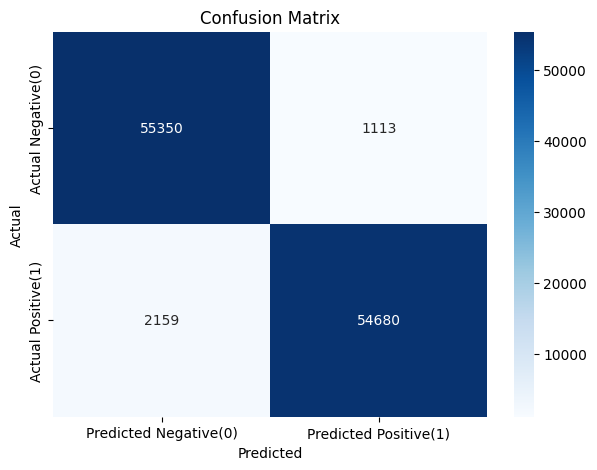

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_df,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
min_time = X_train['Time'].min()
max_time = X_train['Time'].max()
random_transactions = []

for _ in range(28):
    new_transaction = {
        'Time': np.random.uniform(min_time, max_time),
        'Amount': np.random.uniform(0, 500),
        'V1': np.random.uniform(-2, 2),
        'V2': np.random.uniform(-2, 2),
        'V3': np.random.uniform(-2, 2),
        'V4': np.random.uniform(-2, 2),
        'V5': np.random.uniform(-2, 2),
        'V6': np.random.uniform(-2, 2),
        'V7': np.random.uniform(-2, 2),
        'V8': np.random.uniform(-2, 2),
        'V9': np.random.uniform(-2, 2),
        'V10': np.random.uniform(-2, 2),
        'V11': np.random.uniform(-2, 2),
        'V12': np.random.uniform(-2, 2),
        'V13': np.random.uniform(-2, 2),
        'V14': np.random.uniform(-2, 2),
        'V15': np.random.uniform(-2, 2),
        'V16': np.random.uniform(-2, 2),
        'V17': np.random.uniform(-2, 2),
        'V18': np.random.uniform(-2, 2),
        'V19': np.random.uniform(-2, 2),
        'V20': np.random.uniform(-2, 2),
        'V21': np.random.uniform(-2, 2),
        'V22': np.random.uniform(-2, 2),
        'V23': np.random.uniform(-2, 2),
        'V24': np.random.uniform(-2, 2),
        'V25': np.random.uniform(-2, 2),
        'V26': np.random.uniform(-2, 2),
        'V27': np.random.uniform(-2, 2),
        'V28': np.random.uniform(-2, 2),
    }
    random_transactions.append(new_transaction)


random_data = pd.DataFrame(random_transactions)


print(random_data)



             Time      Amount        V1        V2        V3        V4  \
0   169479.196827  167.078722  1.114992 -1.781551  1.284714 -0.002584   
1   143736.338946  129.649836  0.870230  0.776097 -0.923715 -0.967447   
2    25914.350397  140.675098 -0.336535  0.793085 -0.229118  1.021379   
3    85508.045293  360.225545 -0.944425  1.045619  0.225035 -0.743780   
4   128523.802572  496.658582  1.944450  0.530627 -1.520098 -1.077072   
5   149397.170333   95.386990  0.095092  0.758275  0.041200 -1.997205   
6    56239.071596  116.212100  0.259359 -0.169678 -0.924919  1.724126   
7    18712.361519    4.310997  0.846777  0.789363  0.403564  0.022183   
8    16105.741798  403.076445  0.848340 -0.790782 -1.446072 -1.225420   
9    94669.959474  207.281274 -1.435743  0.026112 -1.690209  1.628295   
10   21821.781831  280.491138 -0.073473 -1.164026  0.506304  0.496518   
11   76801.552454   10.149580  0.326071 -1.555163  1.495737 -1.263731   
12  104646.811919  283.763736 -1.108488  0.262829 -

In [ ]:
import pandas as pd
import numpy as np


min_time = X_train['Time'].min()
max_time = X_train['Time'].max()
random_transactions = []

for _ in range(28):
    new_transaction = {
        'Time': np.random.uniform(min_time, max_time),
        'Amount': np.random.uniform(0, 500),
        'V1': np.random.uniform(-2, 2),
        'V2': np.random.uniform(-2, 2),
        'V3': np.random.uniform(-2, 2),
        'V4': np.random.uniform(-2, 2),
        'V5': np.random.uniform(-2, 2),
        'V6': np.random.uniform(-2, 2),
        'V7': np.random.uniform(-2, 2),
        'V8': np.random.uniform(-2, 2),
        'V9': np.random.uniform(-2, 2),
        'V10': np.random.uniform(-2, 2),
        'V11': np.random.uniform(-2, 2),
        'V12': np.random.uniform(-2, 2),
        'V13': np.random.uniform(-2, 2),
        'V14': np.random.uniform(-2, 2),
        'V15': np.random.uniform(-2, 2),
        'V16': np.random.uniform(-2, 2),
        'V17': np.random.uniform(-2, 2),
        'V18': np.random.uniform(-2, 2),
        'V19': np.random.uniform(-2, 2),
        'V20': np.random.uniform(-2, 2),
        'V21': np.random.uniform(-2, 2),
        'V22': np.random.uniform(-2, 2),
        'V23': np.random.uniform(-2, 2),
        'V24': np.random.uniform(-2, 2),
        'V25': np.random.uniform(-2, 2),
        'V26': np.random.uniform(-2, 2),
        'V27': np.random.uniform(-2, 2),
        'V28': np.random.uniform(-2, 2),
    }
    random_transactions.append(new_transaction)


random_data = pd.DataFrame(random_transactions)


random_data = random_data[X_train.columns]


random_predictions = logistic_model.predict(random_data)


for i, prediction in enumerate(random_predictions):
    if prediction == 0:
        print(f"Transaction {i+1}: Genuine Transaction")
    else:
        print(f"Transaction {i+1}: Fraudulent Transaction")


Transaction 1: Genuine Transaction
Transaction 2: Genuine Transaction
Transaction 3: Genuine Transaction
Transaction 4: Genuine Transaction
Transaction 5: Genuine Transaction
Transaction 6: Fraudulent Transaction
Transaction 7: Genuine Transaction
Transaction 8: Genuine Transaction
Transaction 9: Genuine Transaction
Transaction 10: Genuine Transaction
Transaction 11: Fraudulent Transaction
Transaction 12: Genuine Transaction
Transaction 13: Genuine Transaction
Transaction 14: Genuine Transaction
Transaction 15: Fraudulent Transaction
Transaction 16: Fraudulent Transaction
Transaction 17: Genuine Transaction
Transaction 18: Genuine Transaction
Transaction 19: Genuine Transaction
Transaction 20: Genuine Transaction
Transaction 21: Genuine Transaction
Transaction 22: Fraudulent Transaction
Transaction 23: Genuine Transaction
Transaction 24: Genuine Transaction
Transaction 25: Fraudulent Transaction
Transaction 26: Genuine Transaction
Transaction 27: Genuine Transaction
Transaction 28: Gen